In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Harris Corner Detection

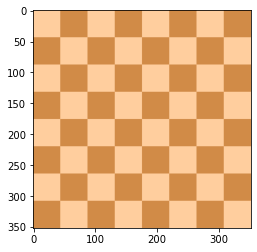

In [2]:
flat_chessboard = cv2.imread('../DATA/flat_chessboard.png')
flat_chessboard = cv2.cvtColor(flat_chessboard,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chessboard);

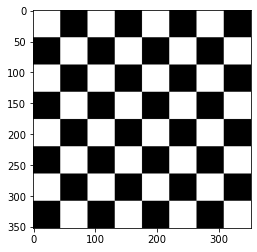

In [3]:
gray_flat_chessboard = cv2.cvtColor(flat_chessboard,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chessboard,cmap='gray');

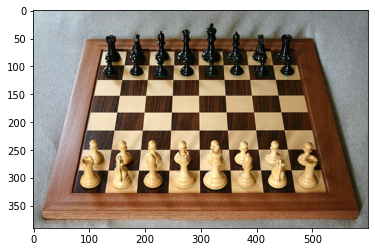

In [4]:
real_chessboard = cv2.imread('../DATA/real_chessboard.jpg')
real_chessboard = cv2.cvtColor(real_chessboard,cv2.COLOR_BGR2RGB)
plt.imshow(real_chessboard);

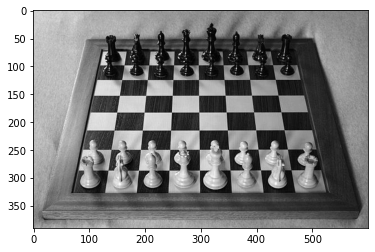

In [5]:
gray_real_chessboard = cv2.cvtColor(real_chessboard,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chessboard,cmap='gray');

In [6]:
gray = np.float32(gray_flat_chessboard)
gray

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]], dtype=float32)

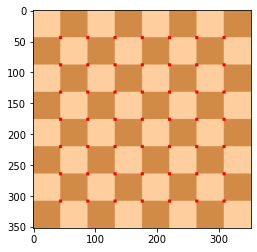

In [7]:
dest = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dest = cv2.dilate(dest,None)
flat_chessboard[dest>0.01*dest.max()] = [255,0,0]
plt.imshow(flat_chessboard);

In [8]:
gray = np.float32(gray_real_chessboard)
gray.shape

(390, 600)

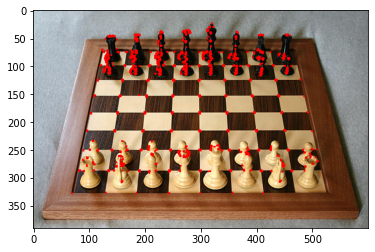

In [9]:
dest = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dest = cv2.dilate(dest,None)
real_chessboard[dest>0.01*dest.max()] = [255,0,0]
plt.imshow(real_chessboard);

## Shi-Tomasi Corner Detection

In [10]:
flat_chessboard = cv2.imread('../DATA/flat_chessboard.png')
flat_chessboard = cv2.cvtColor(flat_chessboard,cv2.COLOR_BGR2RGB)

real_chessboard = cv2.imread('../DATA/real_chessboard.jpg')
real_chessboard = cv2.cvtColor(real_chessboard,cv2.COLOR_BGR2RGB)

gray_flat_chessboard = cv2.cvtColor(flat_chessboard,cv2.COLOR_BGR2GRAY)
gray_real_chessboard = cv2.cvtColor(real_chessboard,cv2.COLOR_BGR2GRAY)

In [11]:
corners = cv2.goodFeaturesToTrack(image=gray_flat_chessboard,maxCorners=64,qualityLevel=0.01,minDistance=10)
corners = np.int0(corners)

In [12]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chessboard,(x,y),3,(255,0,0),-1)

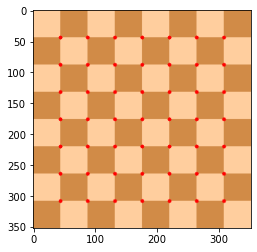

In [13]:
plt.imshow(flat_chessboard);

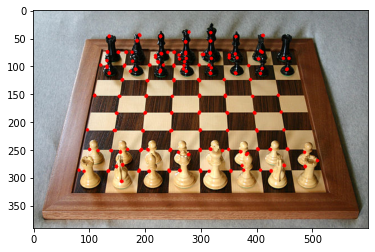

In [15]:
corners = cv2.goodFeaturesToTrack(image=gray_real_chessboard,maxCorners=110,qualityLevel=0.01,minDistance=10,blockSize=2,useHarrisDetector=True)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chessboard,(x,y),3,(255,0,0),-1)
    
plt.imshow(real_chessboard);